# Daily Temperature of Major Cities

*How is the average temperature of the world changing over time?*

In [281]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [282]:
#Load dataset
df = pd.read_csv("dataset/city_temperature.csv")
df.head()

C:\Users\franc\AppData\Local\Temp\ipykernel_48040\2073215155.py:2: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Region  Country State     City  Month  Day  Year  AvgTemperature
0  Africa  Algeria   NaN  Algiers      1    1  1995            64.2
1  Africa  Algeria   NaN  Algiers      1    2  1995            49.4
2  Africa  Algeria   NaN  Algiers      1    3  1995            48.8
3  Africa  Algeria   NaN  Algiers      1    4  1995            46.4
4  Africa  Algeria   NaN  Algiers      1    5  1995            47.9

**O dataset mostra as colunas do local (Continente, Pais, estado e cidade) e de data (Dia, mês e ano)**

## Análise exploratória

In [283]:
df.shape

(2906327, 8)

In [284]:
df.describe()

Month           Day          Year  AvgTemperature
count  2.906327e+06  2.906327e+06  2.906327e+06    2.906327e+06
mean   6.469163e+00  1.571682e+01  2.006624e+03    5.600492e+01
std    3.456489e+00  8.800534e+00  2.338226e+01    3.212359e+01
min    1.000000e+00  0.000000e+00  2.000000e+02   -9.900000e+01
25%    3.000000e+00  8.000000e+00  2.001000e+03    4.580000e+01
50%    6.000000e+00  1.600000e+01  2.007000e+03    6.250000e+01
75%    9.000000e+00  2.300000e+01  2.013000e+03    7.550000e+01
max    1.200000e+01  3.100000e+01  2.020000e+03    1.100000e+02

*Dias com valor 0?*

In [285]:
df[df["Day"] == 0]

Region        Country State         City  \
82774                               Africa         Guinea   NaN      Conakry   
85697                               Africa         Guinea   NaN      Conakry   
92041                               Africa  Guinea-Bissau   NaN       Bissau   
146077                              Africa         Malawi   NaN     Lilongwe   
177862                              Africa        Nigeria   NaN        Lagos   
241159                              Africa         Uganda   NaN      Kampala   
1209901                      North America         Mexico   NaN  Guadalajara   
1333910  South/Central America & Carribean           Cuba   NaN       Havana   

         Month  Day  Year  AvgTemperature  
82774        3    0  2008           -99.0  
85697        3    0  2016           -99.0  
92041        3    0  2008           -99.0  
146077       3    0  2012           -99.0  
177862       3    0  2008           -99.0  
241159       3    0  2012           -99.0  
1209901      3    0  2012           -99.0  
1333910      3    0  2008           -99.0

*Cofunsão no ultimo dia do mês de fevereiro ou primeiro de março*

In [286]:
df.loc[df["Day"] == 0, "Day"] = 1

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [288]:
invalid_dates = pd.to_datetime(df[['Year', 'Month', 'Day']], errors='coerce')
invalid_rows = df[invalid_dates.isna()]
invalid_rows

Region     Country State           City  Month  Day  Year  \
58204           Africa    Ethiopia   NaN    Addis Ababa     12   29   201   
58205           Africa    Ethiopia   NaN    Addis Ababa     12   30   201   
58206           Africa    Ethiopia   NaN    Addis Ababa     12   31   201   
112002          Africa       Kenya   NaN        Nairobi     12   29   201   
112003          Africa       Kenya   NaN        Nairobi     12   30   201   
112004          Africa       Kenya   NaN        Nairobi     12   31   201   
155025          Africa  Mozambique   NaN         Maputo     12   29   201   
155026          Africa  Mozambique   NaN         Maputo     12   30   201   
155027          Africa  Mozambique   NaN         Maputo     12   31   201   
232927          Africa    Tanzania   NaN  Dar Es Salaam     12   29   201   
232928          Africa    Tanzania   NaN  Dar Es Salaam     12   30   201   
232929          Africa    Tanzania   NaN  Dar Es Salaam     12   31   201   
743393          Europe     Germany   NaN        Hamburg     12   29   200   
743394          Europe     Germany   NaN        Hamburg     12   30   200   
743395          Europe     Germany   NaN        Hamburg     12   31   200   
743788          Europe     Germany   NaN        Hamburg     12   29   200   
743789          Europe     Germany   NaN        Hamburg     12   30   200   
743790          Europe     Germany   NaN        Hamburg     12   31   200   
744183          Europe     Germany   NaN        Hamburg     12   29   201   
744184          Europe     Germany   NaN        Hamburg     12   30   201   
744185          Europe     Germany   NaN        Hamburg     12   31   201   
744943          Europe     Germany   NaN        Hamburg     12   29   201   
744944          Europe     Germany   NaN        Hamburg     12   30   201   
744945          Europe     Germany   NaN        Hamburg     12   31   201   
745338          Europe     Germany   NaN        Hamburg     12   29   201   
745339          Europe     Germany   NaN        Hamburg     12   30   201   
745340          Europe     Germany   NaN        Hamburg     12   31   201   
753402          Europe     Germany   NaN         Munich     12   29   201   
753403          Europe     Germany   NaN         Munich     12   30   201   
753404          Europe     Germany   NaN         Munich     12   31   201   
754500          Europe     Germany   NaN         Munich     12   29   201   
754501          Europe     Germany   NaN         Munich     12   30   201   
754502          Europe     Germany   NaN         Munich     12   31   201   
755232          Europe     Germany   NaN         Munich     12   29   201   
755233          Europe     Germany   NaN         Munich     12   30   201   
755234          Europe     Germany   NaN         Munich     12   31   201   
845937          Europe      Norway   NaN           Oslo     12   29   200   
845938          Europe      Norway   NaN           Oslo     12   30   200   
845939          Europe      Norway   NaN           Oslo     12   31   200   
1212429  North America      Mexico   NaN    Guadalajara     12   29   201   
1212430  North America      Mexico   NaN    Guadalajara     12   30   201   
1212431  North America      Mexico   NaN    Guadalajara     12   31   201   

         AvgTemperature  
58204             -99.0  
58205             -99.0  
58206             -99.0  
112002            -99.0  
112003            -99.0  
112004            -99.0  
155025            -99.0  
155026            -99.0  
155027            -99.0  
232927            -99.0  
232928            -99.0  
232929            -99.0  
743393            -99.0  
743394            -99.0  
743395            -99.0  
743788            -99.0  
743789            -99.0  
743790            -99.0  
744183            -99.0  
744184            -99.0  
744185            -99.0  
744943            -99.0  
744944            -99.0  
744945            -99.0  
745338            -99.0  
745339            -99.0  
74

**Alguns anos estão colocados de forma incorreta**

In [289]:
df.loc[df["Year"] == 201, "Year"] = 2001
df.loc[df["Year"] == 200, "Year"] = 2000

**Criando coluna de data (Dia, mês e ano**)

In [290]:
df["Date"] = pd.to_datetime(df[['Year', 'Month', 'Day']], format="%d/%m/%Y")

In [291]:
df.head()

Region  Country State     City  Month  Day  Year  AvgTemperature       Date
0  Africa  Algeria   NaN  Algiers      1    1  1995            64.2 1995-01-01
1  Africa  Algeria   NaN  Algiers      1    2  1995            49.4 1995-01-02
2  Africa  Algeria   NaN  Algiers      1    3  1995            48.8 1995-01-03
3  Africa  Algeria   NaN  Algiers      1    4  1995            46.4 1995-01-04
4  Africa  Algeria   NaN  Algiers      1    5  1995            47.9 1995-01-05

In [292]:
df.Country.unique()

array(['Algeria', 'Burundi', 'Benin', 'Central African Republic', 'Congo',
       'Egypt', 'Ethiopia', 'Gabon', 'Gambia', 'Guinea', 'Guinea-Bissau',
       'Ivory Coast', 'Kenya', 'Morocco', 'Madagascar', 'Mauritania',
       'Malawi', 'Mozambique', 'Namibia', 'Nigeria', 'Senegal',
       'Sierra Leone', 'South Africa', 'Togo', 'Tunisia', 'Tanzania',
       'Uganda', 'Zambia', 'Bangladesh', 'China', 'Hong Kong', 'India',
       'Indonesia', 'Japan', 'Kazakhstan', 'Kyrgyzstan', 'Laos',
       'Malaysia', 'Mongolia', 'Myanmar (Burma)', 'Nepal', 'North Korea',
       'Pakistan', 'Philippines', 'Singapore', 'South Korea', 'Sri Lanka',
       'Taiwan', 'Tajikistan', 'Thailand', 'Turkmenistan', 'Uzbekistan',
       'Vietnam', 'Australia', 'New Zealand', 'Albania', 'Austria',
       'Belarus', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany',
       'Georgia', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy',
       'Latvia', 'Ma

## Serie temporal de um país (Portugal - Lisboa)

### Pré-processamento

**Dataset com dados de Lisboa (Portugal)**

In [293]:
df_pt = df[df["Country"] == "Portugal"]
df_pt.head()

Region   Country State    City  Month  Day  Year  AvgTemperature  \
859724  Europe  Portugal   NaN  Lisbon      1    1  1995            53.5   
859725  Europe  Portugal   NaN  Lisbon      1    2  1995            46.9   
859726  Europe  Portugal   NaN  Lisbon      1    3  1995            45.8   
859727  Europe  Portugal   NaN  Lisbon      1    4  1995            53.3   
859728  Europe  Portugal   NaN  Lisbon      1    5  1995            56.2   

             Date  
859724 1995-01-01  
859725 1995-01-02  
859726 1995-01-03  
859727 1995-01-04  
859728 1995-01-05

In [294]:
df_pt["City"].unique()

array(['Lisbon'], dtype=object)

**Dataframe de series temporais**

In [295]:
df_pt = df_pt[["Date", "AvgTemperature"]]

In [296]:
import plotly.express as px

fig = px.line(df_pt, x='Date', y='AvgTemperature', 
              title='Temperatura ao Longo do Tempo',
              labels={'Data': 'Data', 'AvgTemperature': 'Temperatura (F)'})

# Exibir o gráfico interativo
fig.show()

*Menor temperatura já registrada em portugal foi de 14º por isso vou colocar a temperatura do dia anterior, dados com -99°*

**Temperaturas abaixo do normal**

In [297]:
df_pt[df_pt['AvgTemperature'] < 6.8]

Date  AvgTemperature
860658 1997-07-23           -99.0
860908 1998-03-30           -99.0
860913 1998-04-04           -99.0
860914 1998-04-05           -99.0
861177 1998-12-24           -99.0
861183 1998-12-30           -99.0
861184 1998-12-31           -99.0
861194 1999-01-10           -99.0
861325 1999-05-21           -99.0
862449 2002-06-18           -99.0
862450 2002-06-19           -99.0
862451 2002-06-20           -99.0
862452 2002-06-21           -99.0
863033 2004-01-23           -99.0
863669 2005-10-20           -99.0
863928 2006-07-06           -99.0
864256 2007-05-30           -99.0
864346 2007-08-28           -99.0
864447 2007-12-07           -99.0
864739 2008-09-24           -99.0
864936 2009-04-09           -99.0
865895 2011-11-24           -99.0
866251 2012-11-14           -99.0
866476 2013-06-27           -99.0
866610 2013-11-08           -99.0
866700 2014-02-06           -99.0
867100 2015-03-13           -99.0
867393 2015-12-30           -99.0
867394 2015-12-31           -99.0
867464 2016-03-10           -99.0
867520 2016-05-05           -99.0
867659 2016-09-21           -99.0
867710 2016-11-11           -99.0
868129 2018-01-04           -99.0
868443 2018-11-14           -99.0
868444 2018-11-15           -99.0
868446 2018-11-17           -99.0
868513 2019-01-23           -99.0
868604 2019-04-24           -99.0
868626 2019-05-16           -99.0
868627 2019-05-17           -99.0
868628 2019-05-18           -99.0
868629 2019-05-19           -99.0
868886 2020-01-31           -99.0

**Removendo temperaturas abaixo da minima já registrada**

In [298]:
df_pt.sort_values(by='Date', inplace=True)

df_pt.loc[df_pt['AvgTemperature'] < 6.8, 'AvgTemperature'] = None

df_pt['AvgTemperature'].fillna(method='ffill', inplace=True)



C:\Users\franc\AppData\Local\Temp\ipykernel_48040\519809923.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\franc\AppData\Local\Temp\ipykernel_48040\519809923.py:5: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [299]:
df_pt[df_pt['AvgTemperature'] < 6.8]

Empty DataFrame
Columns: [Date, AvgTemperature]
Index: []

**Temperatura durante um ano**

In [300]:
import plotly.express as px

fig = px.line(df_pt[df_pt["Date"].dt.year == 2018], x='Date', y='AvgTemperature', 
              title='Temperatura ao Longo do Tempo',
              labels={'Data': 'Data', 'AvgTemperature': 'Temperatura (F)'})

fig.show()

### Estacionariedade

In [301]:
from statsmodels.tsa.stattools import adfuller, kpss

def estac(df):

  adf = adfuller(df)
  print(f'Valor-p do Teste ADF: {adf[1]:.4f}')
  if adf[1] > 0.05:
    print('Não rejeitar a Hipótese Nula: a série não é estacionária\n')
  else:
    print('Rejeitar a Hipótese Nula: a série é estacionária\n')

  kpss_saida = kpss(df)
  print(f'Valor-p do Teste KPSS: {kpss_saida[1]:.4f}')
  if kpss_saida[1] > 0.05:
    print('Não rejeitar a Hipótese Nula: a série é estacionária\n')
  else:
    print('Rejeitar a Hipótese Nula: a série não é estacionária\n')

In [302]:
estac(df_pt.set_index("Date"))

Valor-p do Teste ADF: 0.0000
Rejeitar a Hipótese Nula: a série é estacionária

Valor-p do Teste KPSS: 0.1000
Não rejeitar a Hipótese Nula: a série é estacionária



C:\Users\franc\AppData\Local\Temp\ipykernel_48040\460481291.py:12: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




### Docomposição

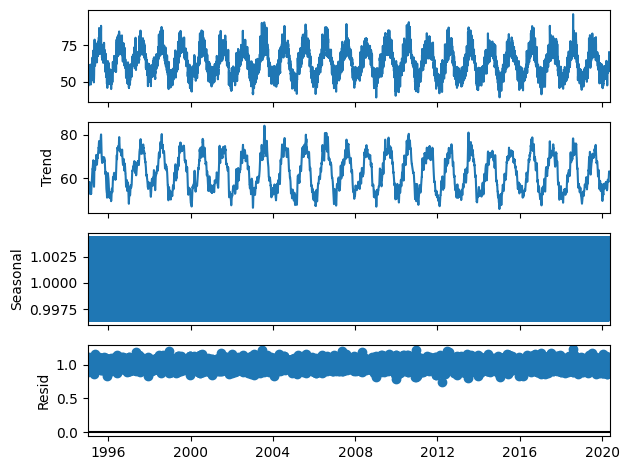

In [303]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df_pt.set_index("Date"), model='multiplicative', period=12) 

# Plotando as componentes
fig = decomposition.plot()
plt.show()

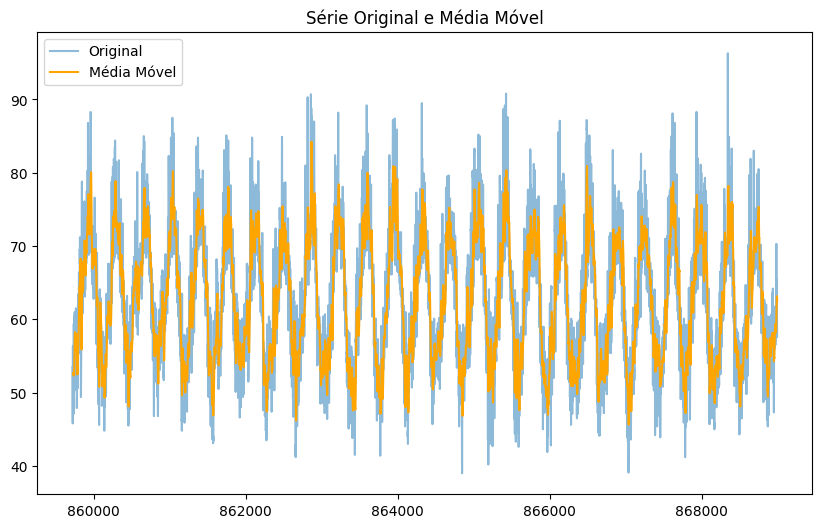

In [304]:

df_pt['media_movel'] = df_pt['AvgTemperature'].rolling(window=12).mean() 

plt.figure(figsize=(10, 6))
plt.plot(df_pt['AvgTemperature'], label='Original', alpha=0.5)
plt.plot(df_pt['media_movel'], label='Média Móvel', color='orange')
plt.legend()
plt.title('Série Original e Média Móvel')
plt.show()


In [305]:
df_anual = df_pt[df_pt["Date"].dt.year == 2018].groupby(df_pt["Date"].dt.month).mean()
df_anual["Date"] = df_anual["Date"].dt.month
df_anual.head()

Date  AvgTemperature  media_movel
Date                                   
1        1       52.619355    53.154301
2        2       51.421429    51.366667
3        3       53.787097    53.720699
4        4       56.880000    56.218056
5        5       61.616129    60.930914

<Axes: xlabel='Date', ylabel='AvgTemperature'>

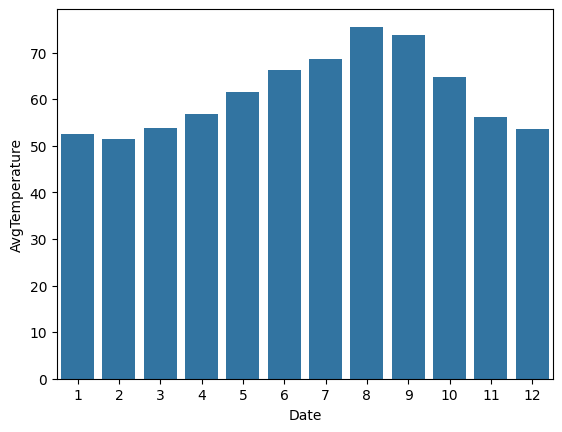

In [306]:
sns.barplot(df_anual, x=df_anual["Date"], y=df_anual["AvgTemperature"])

## Treinamento prophet

In [307]:
from prophet import Prophet

### Entendendo componentes

**Criando dataframe prophet**

In [308]:
df_prophet = pd.DataFrame()

df_prophet['ds'] = df_pt['Date']
df_prophet['y'] = df_pt['AvgTemperature']

df_prophet.reset_index(inplace=True, drop=True)
df_prophet.head()

ds     y
0 1995-01-01  53.5
1 1995-01-02  46.9
2 1995-01-03  45.8
3 1995-01-04  53.3
4 1995-01-05  56.2

**Treinando modelo**

In [309]:
np.random.seed(4587)

model = Prophet()
model.fit(df_prophet)

13:36:12 - cmdstanpy - INFO - Chain [1] start processing
13:36:14 - cmdstanpy - INFO - Chain [1] done processing


**Realizando previão**

In [310]:
pred = model.predict()

In [311]:
from prophet.plot import plot_plotly
fig = plot_plotly(model, pred)
fig.show()

**Componentes**

In [312]:
from prophet.plot import plot_components_plotly

plot_components_plotly(model, pred)

### Avaliando modelo

**Separando dataset de treino e outro de teste**

In [313]:
train_size = int(len(df_prophet) * 0.8)

In [314]:
train = pd.DataFrame()

train['ds'] = df_prophet['ds'][:train_size] # 80% treino
train['y'] = df_prophet['y'][:train_size]

test = pd.DataFrame()

test['ds'] = df_prophet['ds'][train_size:] # 20% teste
test['y'] = df_prophet['y'][train_size:]
test.shape

(1854, 2)

**Treinamento e predict do tempo de teste**

In [315]:
model = Prophet()

model.fit(train)

future = model.make_future_dataframe(periods=1854, freq='D')
pred = model.predict(future)

13:36:17 - cmdstanpy - INFO - Chain [1] start processing
13:36:18 - cmdstanpy - INFO - Chain [1] done processing


**Comparação do predict com real**

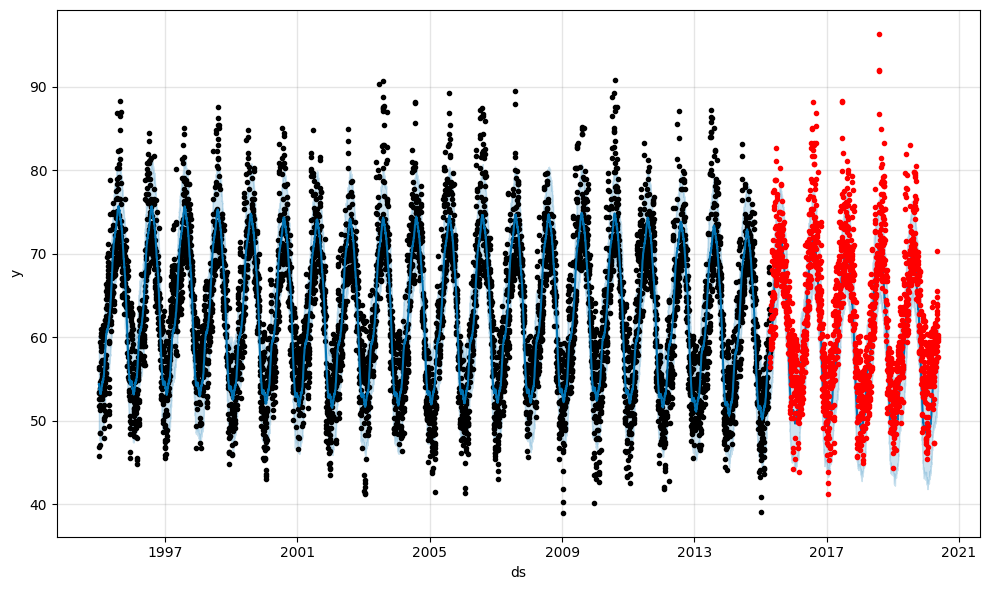

In [316]:
fig1 = model.plot(pred)

import matplotlib.pyplot as plt
plt.plot(test['ds'], test['y'], '.r')
plt.show()

In [317]:
df_pred = pred[['ds', 'yhat']]
df_comp = pd.merge(df_pred, test, on='ds', how='inner')
df_comp

ds       yhat     y
0    2015-04-18  58.310410  56.4
1    2015-04-19  58.343173  57.1
2    2015-04-20  58.435651  57.7
3    2015-04-21  58.696326  60.7
4    2015-04-22  58.903323  60.9
...         ...        ...   ...
1849 2020-05-09  58.424925  59.8
1850 2020-05-10  58.547089  60.0
1851 2020-05-11  58.732473  60.3
1852 2020-05-12  59.089845  59.6
1853 2020-05-13  59.397489  57.6

[1854 rows x 3 columns]

**Metricas Mean Squared Error** e **Mean Absolute Error**

In [318]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

rmse = root_mean_squared_error(df_comp['y'], df_comp['yhat']).round(2)
mae = mean_absolute_error(df_comp['y'], df_comp['yhat']).round(2)
print(f'MSE: {mae}, RMSE: {rmse}')

MSE: 3.95, RMSE: 5.19


**R2 Score**

In [319]:
from sklearn.metrics import r2_score

r2_score(df_comp['y'],df_comp['yhat'])

0.6277243040796888

### Avaliando a performance para 1 ano

In [320]:
future = model.make_future_dataframe(periods=365, freq='D')
pred = model.predict(future)

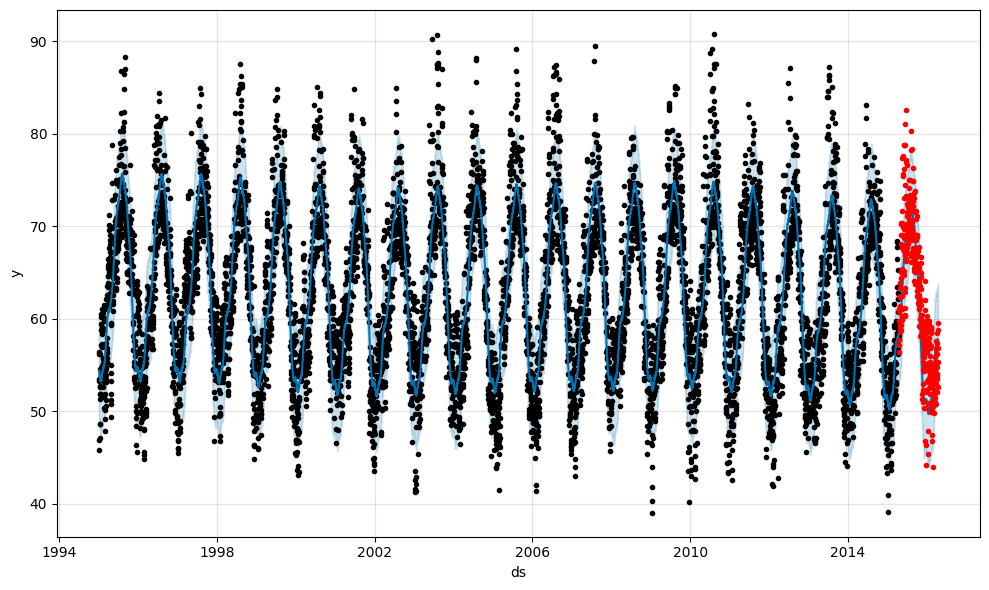

In [321]:
fig1 = model.plot(pred)

import matplotlib.pyplot as plt
plt.plot(test['ds'][:365], test['y'][:365], '.r')
plt.show()

In [322]:
df_pred = pred[['ds', 'yhat']]
df_comp = pd.merge(df_pred, test[:365], on='ds', how='inner')
df_comp

ds       yhat     y
0   2015-04-18  58.310410  56.4
1   2015-04-19  58.343173  57.1
2   2015-04-20  58.435651  57.7
3   2015-04-21  58.696326  60.7
4   2015-04-22  58.903323  60.9
..         ...        ...   ...
360 2016-04-11  57.385757  52.6
361 2016-04-12  57.611881  55.3
362 2016-04-13  57.786223  56.8
363 2016-04-14  57.793029  58.8
364 2016-04-15  57.758010  59.5

[365 rows x 3 columns]

In [323]:
rmse = root_mean_squared_error(df_comp['y'], df_comp['yhat']).round(2)
mae = mean_absolute_error(df_comp['y'], df_comp['yhat']).round(2)
print(f'MSE: {mae}, RMSE: {rmse}')

MSE: 3.6, RMSE: 4.58
